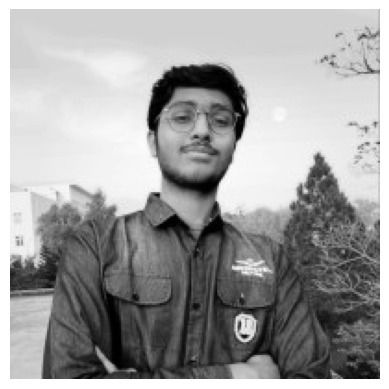

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image file
image = Image.open("ali.jpg")  # Replace "sample.jpg" with the path to your image

# Convert the image to grayscale
gray_image = image.convert("L")

# Save the grayscale image if needed
gray_image.save("ali_gray.jpg")  # Replace "sample_gray.jpg" with your desired output file path

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

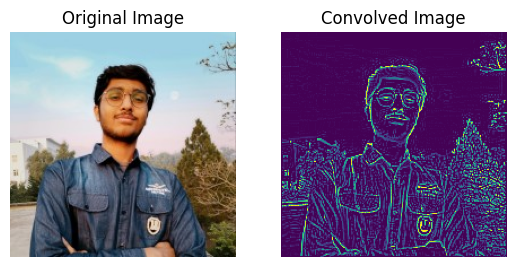

In [35]:
import tensorflow as tf
import numpy as np

image = np.array(image)

# Convert the image to grayscale if it's not already
if len(image.shape) == 3 and image.shape[2] == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

# Convert the image to a tensor
image_tensor = tf.constant(image, dtype=tf.float32)

# Reshape the image tensor to add a batch dimension
image_tensor = tf.reshape(image_tensor, [1, image_tensor.shape[0], image_tensor.shape[1], 1])

# Define a 3x3 convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]], dtype=np.float32)
kernel = tf.constant(kernel, dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Apply convolution operation
output = tf.nn.conv2d(image_tensor, kernel, strides=[1, 1, 1, 1], padding="SAME")

# Remove the batch dimension from the output
output = tf.squeeze(output)

# Normalize the output to the range [0, 255]
output = tf.clip_by_value(output, 0.0, 255.0)
output = tf.round(output)
output = tf.cast(output, dtype=tf.uint8)

# Convert the output tensor to a NumPy array
output_array = output.numpy()

# Save the resulting image
output_image = Image.fromarray(output_array)
output_image.save("convolution_result.jpg")  # Replace with your desired output file path

# Display the output image using matplotlib
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image.open("ali.jpg"))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Convolved Image")
plt.imshow(output_image)
plt.axis("off")
plt.show()

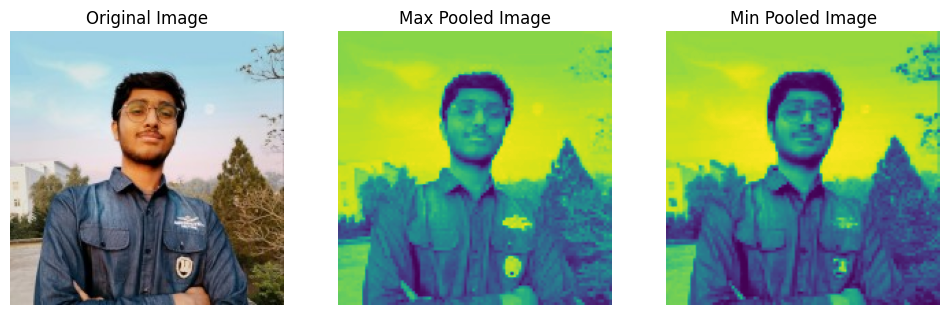

In [32]:
# Open the image file
image = Image.open("ali.jpg")  # Replace "sample.jpg" with the path to your image
image = np.array(image)

# Convert the image to grayscale if it's not already
if len(image.shape) == 3 and image.shape[2] == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

# Convert the image to a tensor
image_tensor = tf.constant(image, dtype=tf.float32)

# Reshape the image tensor to add a batch dimension
image_tensor = tf.reshape(image_tensor, [1, image_tensor.shape[0], image_tensor.shape[1], 1])

# Apply max pooling
max_pooled = tf.nn.max_pool2d(image_tensor, ksize=(2, 2), strides=(2, 2), padding="VALID")

# Apply min pooling
min_pooled = -tf.nn.max_pool2d(-image_tensor, ksize=(2, 2), strides=(2, 2), padding="VALID")

# Remove the batch dimension from the pooled images
max_pooled = tf.squeeze(max_pooled)
min_pooled = tf.squeeze(min_pooled)

# Display the original, max-pooled, and min-pooled images using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(Image.open("ali.jpg"))
plt.axis('off')

# Max Pooled Image
plt.subplot(1, 3, 2)
plt.title("Max Pooled Image")
plt.imshow(max_pooled)
plt.axis('off')

# Min Pooled Image
plt.subplot(1, 3, 3)
plt.title("Min Pooled Image")
plt.imshow(min_pooled)
plt.axis('off')

plt.show()

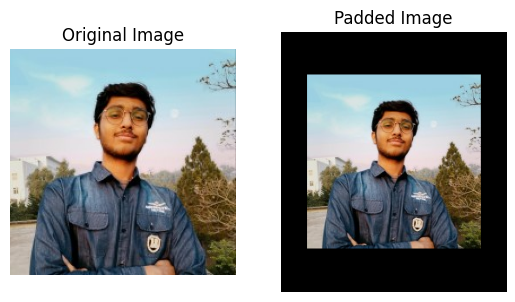

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image using TensorFlow (assuming you have TensorFlow Dataset)
image_path = "ali.jpg"  # Replace with the path to your image
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Decode the image (3 channels for RGB)

# Define the amount of padding you want (in pixels)
top_padding = 50
bottom_padding = 50
left_padding = 30
right_padding = 30

# Apply padding to the image
padded_image = tf.image.pad_to_bounding_box(
    image,
    offset_height=top_padding,
    offset_width=left_padding,
    target_height=image.shape[0] + top_padding + bottom_padding,
    target_width=image.shape[1] + left_padding + right_padding
)

# Convert the TensorFlow tensor to a NumPy array for visualization
padded_array = padded_image.numpy()

padded_image = Image.fromarray(padded_array)
padded_image.save("padded_image.jpg")  # Replace with your desired output file path

# Display the original and padded images using Matplotlib
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Padded Image")
plt.imshow(padded_image)
plt.axis("off")

plt.show()


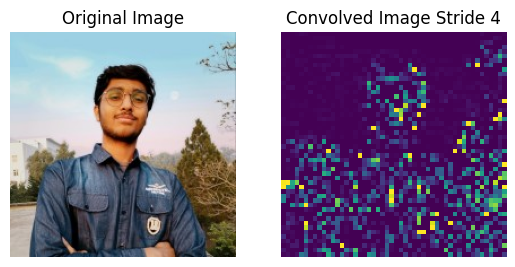

In [37]:
# Open the image file
image = Image.open("ali.jpg")  # Replace "sample.jpg" with the path to your image
image = np.array(image)

# Convert the image to grayscale if it's not already
if len(image.shape) == 3 and image.shape[2] == 3:
    image = np.mean(image, axis=2).astype(np.uint8)

# Convert the image to a tensor
image_tensor = tf.constant(image, dtype=tf.float32)

# Reshape the image tensor to add a batch dimension
image_tensor = tf.reshape(image_tensor, [1, image_tensor.shape[0], image_tensor.shape[1], 1])

# Define a 3x3 convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]], dtype=np.float32)
kernel = tf.constant(kernel, dtype=tf.float32)
kernel = tf.reshape(kernel, [3, 3, 1, 1])

# Apply convolution with a stride of 4
output = tf.nn.conv2d(image_tensor, kernel, strides=[1, 4, 4, 1], padding="SAME")

# Remove the batch dimension from the output
output = tf.squeeze(output)

# Normalize the output to the range [0, 255]
output = tf.clip_by_value(output, 0.0, 255.0)
output = tf.round(output)
output = tf.cast(output, dtype=tf.uint8)

# Convert the output tensor to a NumPy array
output_array = output.numpy()

# Save the resulting image
output_image = Image.fromarray(output_array)
output_image.save("convolution_result_stride4.jpg")  # Replace with your desired output file path

# Display the output image using matplotlib
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(Image.open("ali.jpg"))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Convolved Image Stride 4")
plt.imshow(output_image)
plt.axis("off")
plt.show()

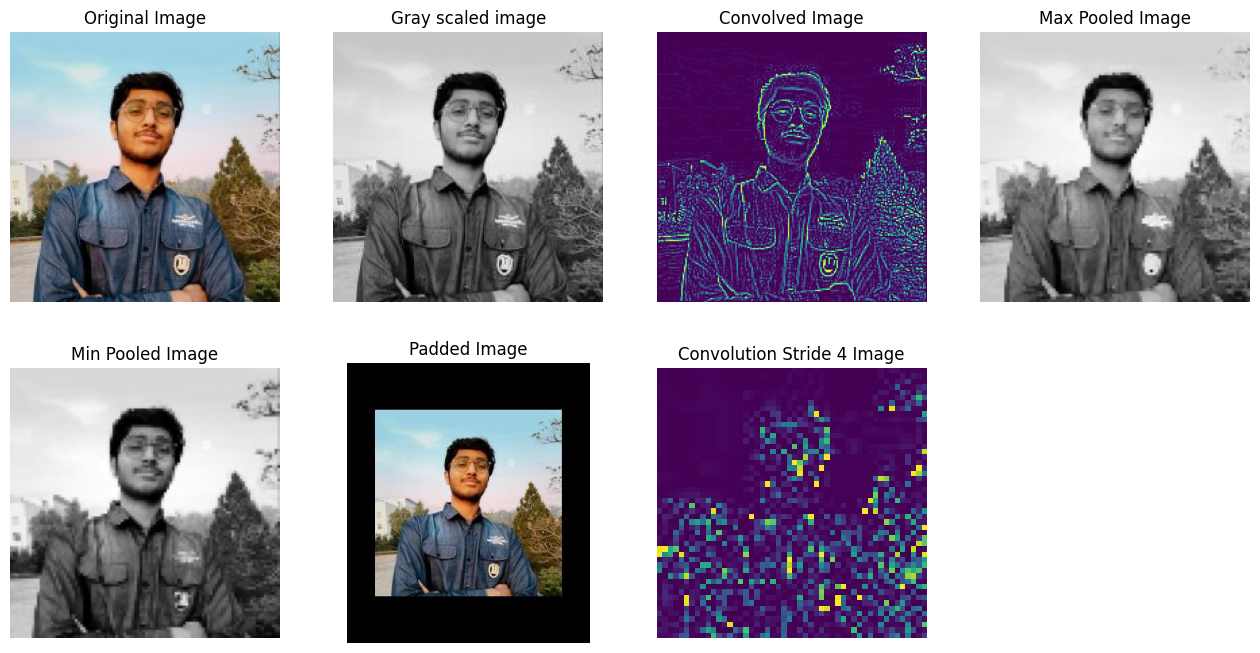

In [46]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.title("Original Image")
plt.imshow(Image.open("ali.jpg"))
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title("Gray scaled image")
plt.imshow(Image.open("ali_gray.jpg"), cmap='gray')
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title("Convolved Image")
plt.imshow(Image.open("convolution_result.jpg"))
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title("Max Pooled Image")
plt.imshow(max_pooled, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title("Min Pooled Image")
plt.imshow(min_pooled, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title("Padded Image")
plt.imshow(Image.open("padded_image.jpg"))
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Convolution Stride 4 Image")
plt.imshow(Image.open("convolution_result_stride4.jpg"))
plt.axis("off")

plt.show()